#Imports and Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import sklearn.decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB



In [2]:
ng_train = fetch_20newsgroups(subset = 'train')
ng_test = fetch_20newsgroups(subset = 'test')

train_labels = ng_train.target
test_labels = ng_test.target
target_names = ng_train.target_names

CV = CountVectorizer()
v_train = CV.fit_transform(ng_train.data)
v_test = CV.transform(ng_test.data)



#Clf

In [3]:
MNB = MultinomialNB()
MNB.fit(v_train,train_labels)
preds = MNB.predict(v_test)
acc = accuracy_score(y_true=test_labels, y_pred=preds)
print(acc)

cmat = confusion_matrix(test_labels, preds, labels=[0,1,2,3,4,5,6,7,8,9])



0.7728359001593202


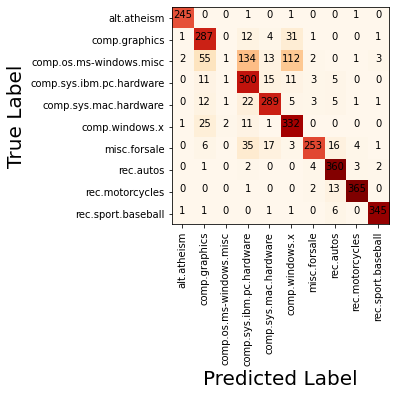

In [4]:
fig,ax = plt.subplots()
ax.imshow(cmat,cmap='OrRd')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(target_names,rotation = 90)
ax.set_yticklabels(target_names)
ax.set_ylim(len(cmat)-.5,-.5)
ax.set_xlabel('Predicted Label',size=20)
ax.set_ylabel('True Label',size=20)


for i in range(10):
    for j in range(10):
        test = ax.text(j,i,cmat[i,j], ha='center', color='k')



0.7823951141795008


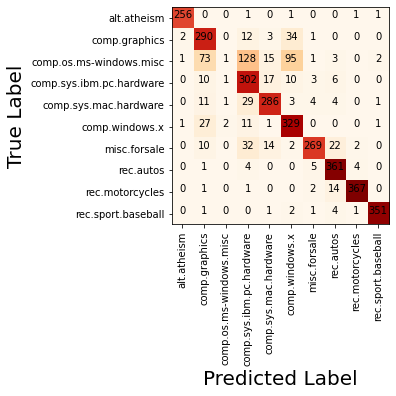

In [10]:
b_train = v_train.astype('bool').astype('int')
b_test = v_test.astype('bool').astype('int')


BNB = BernoulliNB()
BNB.fit(b_train,train_labels)
preds = MNB.predict(b_test)
acc = accuracy_score(y_true=test_labels, y_pred=preds)
print(acc)

cmat = confusion_matrix(test_labels, preds, labels=[0,1,2,3,4,5,6,7,8,9])

fig,ax = plt.subplots()
ax.imshow(cmat,cmap='OrRd')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(target_names,rotation = 90)
ax.set_yticklabels(target_names)
ax.set_ylim(len(cmat)-.5,-.5)
ax.set_xlabel('Predicted Label',size=20)
ax.set_ylabel('True Label',size=20)
for i in range(10):
    for j in range(10):
        test = ax.text(j,i,cmat[i,j], ha='center', color='k')

